In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

Matplotlib is building the font cache; this may take a moment.


In [5]:

# read the data

df = pd.read_csv('SaYoPillow.csv')

In [6]:


df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

In [7]:
y = df["stress_level"]
X = df.drop(["stress_level"], axis= 1)

In [10]:

y.head()

0    3
1    3
2    1
3    3
4    0
Name: stress_level, dtype: int64

In [12]:

X.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12


In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [14]:
y_hat= knn_model.predict(X_train)
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        97

    accuracy                           1.00       472
   macro avg       1.00      1.00      1.00       472
weighted avg       1.00      1.00      1.00       472



In [15]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [16]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        29

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



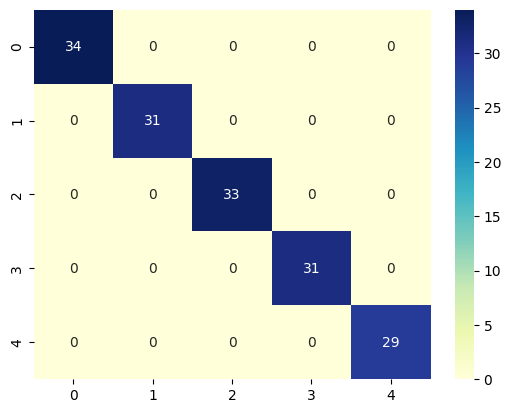

In [18]:
mat = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')

In [19]:
import pickle
pickle.dump(knn_model, open('knn_model.pkl', 'wb'))

In [20]:
knn_model = pickle.load(open('knn_model.pkl', 'rb'))
print(knn_model.predict([[96.288,26.288,85.36,17.144,82.432,100.36,0,75.72]]))

[4]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
